In [28]:
import csv
import matplotlib.pyplot as plt
import os
import imageio

def load_all_fitnesses(filename) :
    with open(filename) as file :
        csv_data = csv.reader(file,delimiter=',')
        best_fitnesses = []
        avg_fitnesses = []
        pop_size= []
        nb_eval = []
        nb_eval_tot = 0
        for row in csv_data :
            best_fitness = 0
            avg_fitness = 0
            nb_eval_tot += int(row[1])
            for cell in row[2:-1] :
                if(float(cell) > best_fitness) :
                    best_fitness = float(cell)
                avg_fitness += float(cell)
            avg_fitness = avg_fitness/float(row[1])
            avg_fitnesses.append(avg_fitness)
            best_fitnesses.append(best_fitness)
            nb_eval.append(nb_eval_tot)
            pop_size.append(float(row[1]))
            
    return nb_eval, best_fitnesses, avg_fitnesses, pop_size

def load_final_pos(filename,pop,gen) :
    with open(filename) as file :
        csv_data = csv.reader(file,delimiter=',')
        x = []
        y = []
        for row in csv_data :
            if(float(row[1]) == gen) :
                i = 0
                j = 2
                while(i < pop - 1):
                    if(j >= len(row) -1) :
                        break
                    if(float(row[j]) == i and float(row[j+1]) != i+1) :
                        x.append(float(row[j+1]))
                        y.append(float(row[j+2]))
                        j+=3
                    
                    j+=1
                    i+=1
                break
        return x, y
    
def load_eval_time(filename) :
    with open(filename) as file :
        csv_data = csv.reader(file,delimiter=',')
        durations = []
        eval_nb = []
        i = 1
        for row in csv_data :
            durations.append(float(row[1])/1000000000.)
            eval_nb.append(i)
            i+=1
    return eval_nb, durations

def animation_pop(foldername,pop_size,step) :
    plt.ioff()
    images = []
    for i in range(0,len(pop_size),step) :
        x_vec = []
        y_vec = []
        if(not os.path.isdir(foldername)) :
            continue
        x, y = load_final_pos(foldername + "/final_pos.csv",pop_size[i],i)
        x_vec = x_vec + x
        y_vec = y_vec + y   
                
        fig2, ax2 = plt.subplots(figsize=[10,10])
        ax2.set_ylim(-1.,1.)
        ax2.set_xlim(-1.,1.)
        plt.title("Generation " + str(i))
        plt.plot(x_vec,y_vec,'o')
        plt.savefig(foldername + "/pop_" + str(i) + ".jpg")
        plt.close(fig2)
        images.append(imageio.imread(foldername + "/pop_" + str(i) + ".jpg"))
    imageio.mimwrite(foldername + "_pop_gen.gif",images)
    
def load_stop_crit(foldername) :
    filename = folder + '/stop_crit.csv'
    generation = []
    criteria = []
    if not os.path.isfile(filename) :
        return generation, criteria
    with open(filename) as file :
        
        csv_data = csv.reader(file,delimiter=',')
        for row in csv_data :
            generation.append(int(row.split(',')[0]))
            criteria.append(row.split(',')[1])
    return generation, criteria


20
20
20
20
20
19


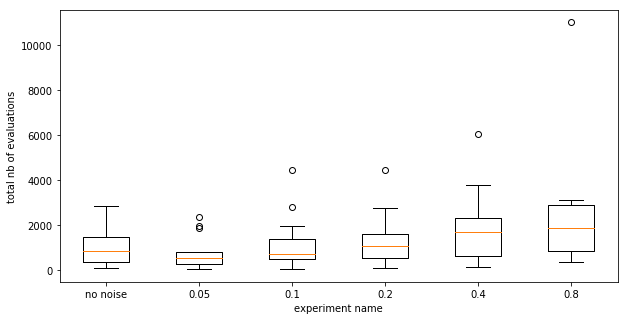

In [2]:
list_dir = [ "/home/leni/are-logs/are_ipop_escape_0/", \
            "/home/leni/are-logs/are_ipop_escape_005/", \
           "/home/leni/are-logs/are_ipop_escape_01/", \
           "/home/leni/are-logs/are_ipop_escape_02/", \
           "/home/leni/are-logs/are_ipop_escape_04/", \
           "/home/leni/are-logs/are_ipop_escape_08/"]
list_label = ["no noise","0.05","0.1","0.2","0.4","0.8"]
best_fits = []
i = 0   
nbevals = []
for dire in list_dir :
    nevals = []
    for folder in os.listdir(dire) :
        if(folder.split("_")[0] != "ipop") :
            continue
        neval, best_fit, avg_fit,pop_size = load_all_fitnesses(dire + folder + "/fitnesses_hn.csv")
        nevals.append(neval[-1])
    print(len(nevals))
    nbevals.append(nevals)
    
plt.figure(figsize=(10,5))
plt.boxplot(nbevals,labels=list_label)
plt.ylabel("total nb of evaluations")
plt.xlabel("experiment name")
plt.show()

20
20
20
20


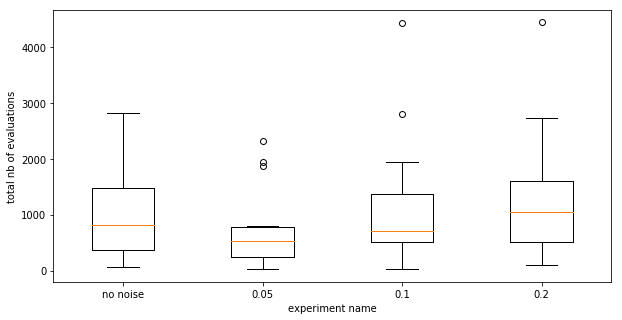

In [3]:
list_dir = [ "/home/leni/are-logs/are_ipop_escape_0/", \
            "/home/leni/are-logs/are_ipop_escape_005/", \
           "/home/leni/are-logs/are_ipop_escape_01/", \
           "/home/leni/are-logs/are_ipop_escape_02/"]
list_label = ["no noise","0.05","0.1","0.2"]
best_fits = []
i = 0   
nbevals = []
for dire in list_dir :
    nevals = []
    for folder in os.listdir(dire) :
        if(folder.split("_")[0] != "ipop") :
            continue
        neval, best_fit, avg_fit,pop_size = load_all_fitnesses(dire + folder + "/fitnesses_hn.csv")
        nevals.append(neval[-1])
    print(len(nevals))
    nbevals.append(nevals)
    
plt.figure(figsize=(10,5))
plt.boxplot(nbevals,labels=list_label)
plt.ylabel("total nb of evaluations")
plt.xlabel("experiment name")
plt.show()

21
20
10
10
10
10


Text(0.5, 0, 'experiment name')

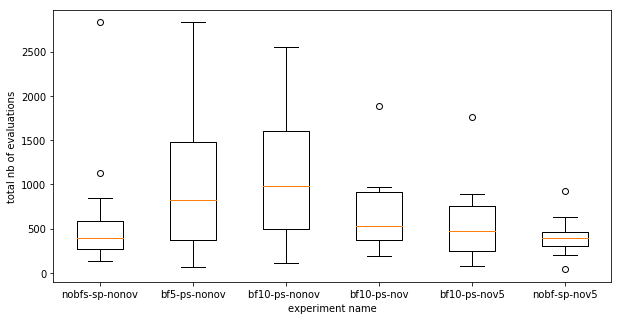

In [36]:
list_dir = [ "/home/leni/are-logs/are_ipop_escape/", \
            "/home/leni/are-logs/are_ipop_escape_0/", \
           "/home/leni/are-logs/are_ipop_escape_los10/", \
           "/home/leni/are-logs/are_ipop_escape_nov_1/", \
           "/home/leni/are-logs/are_ipop_escape_los10_kv5/", \
           "/home/leni/are-logs/are_ipop_escape_nolos_kv5/"]
list_label = ["nobfs-sp-nonov","bf5-ps-nonov","bf10-ps-nonov ","bf10-ps-nov","bf10-ps-nov5","nobf-sp-nov5"]
best_fits = []
i = 0   
nbevals = []
for dire in list_dir :
    nevals = []
    for folder in os.listdir(dire) :
        if(folder.split("_")[0] != "ipop") :
            continue
        if(not os.path.isdir(dire + folder)) :
            continue
        neval, best_fit, avg_fit,pop_size = load_all_fitnesses(dire + folder + "/fitnesses_hn.csv")
        nevals.append(neval[-1])
    print(len(nevals))
    nbevals.append(nevals)
    
plt.figure(figsize=(10,5))
plt.boxplot(nbevals,labels=list_label)
plt.ylabel("total nb of evaluations")
plt.xlabel("experiment name")

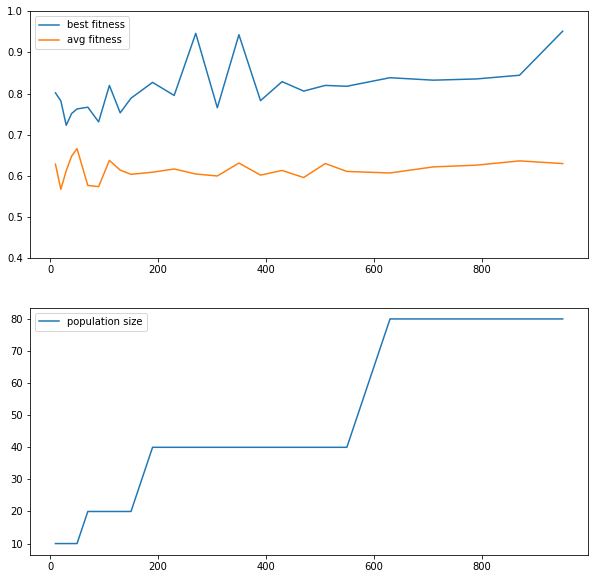

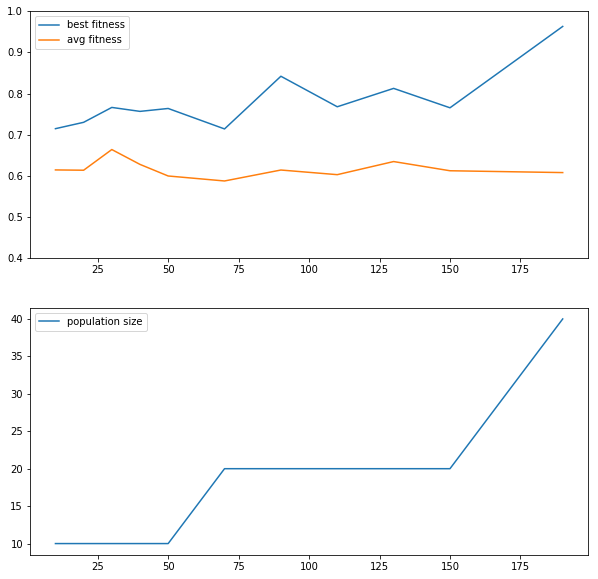

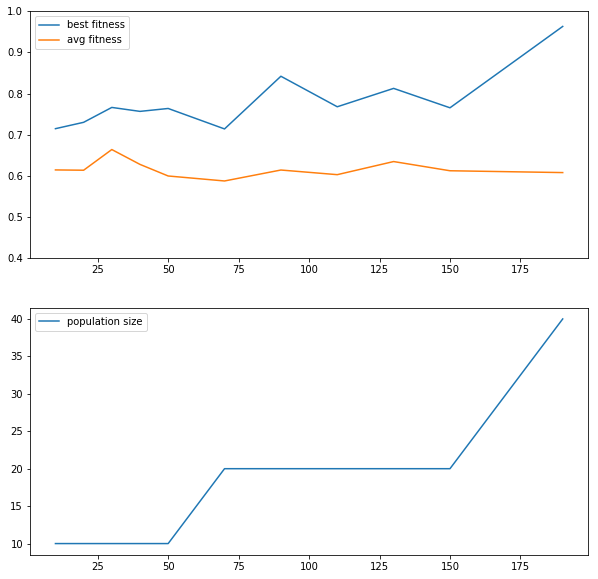

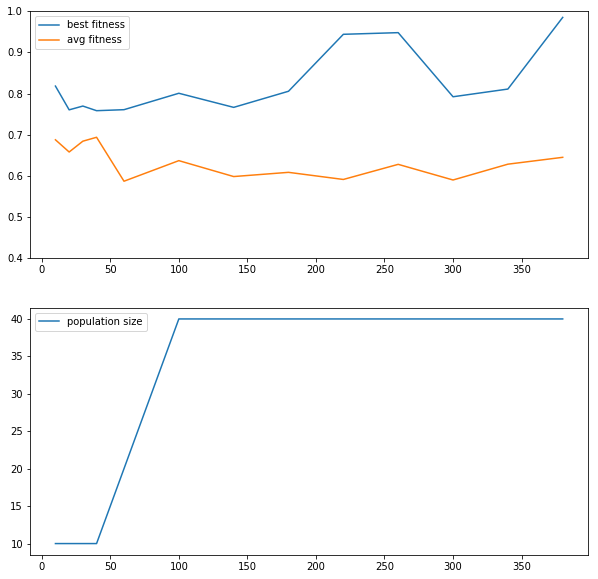

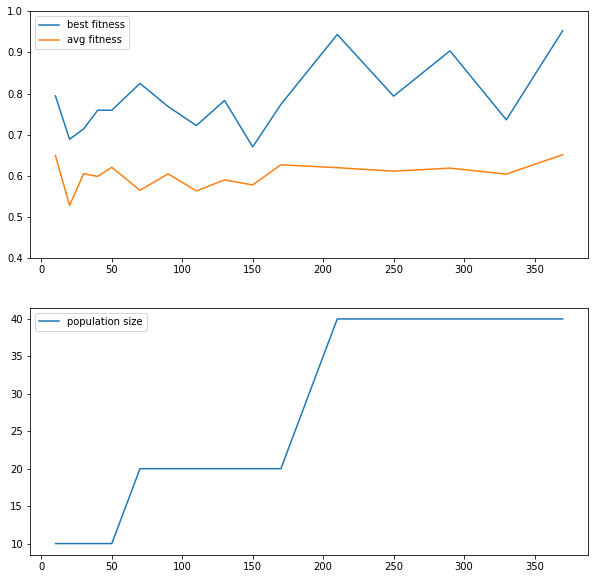

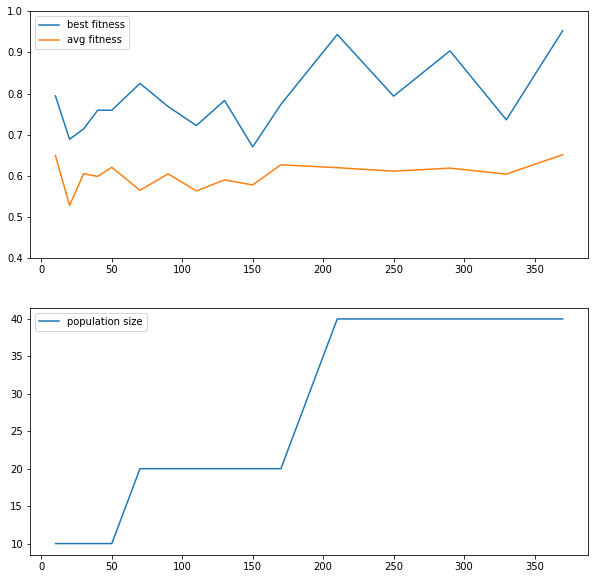

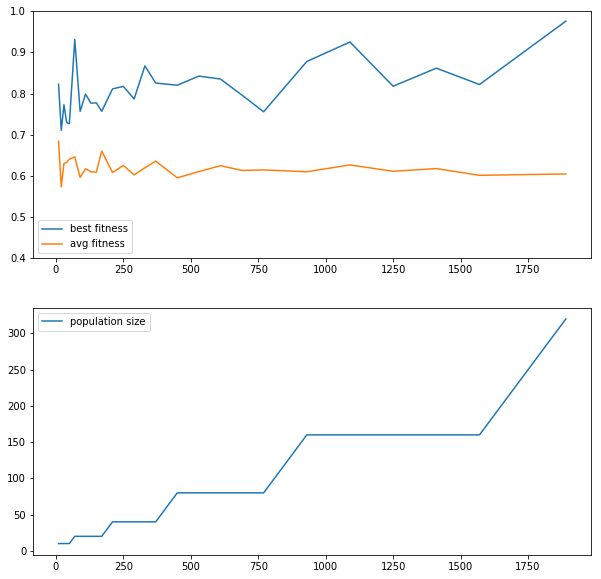

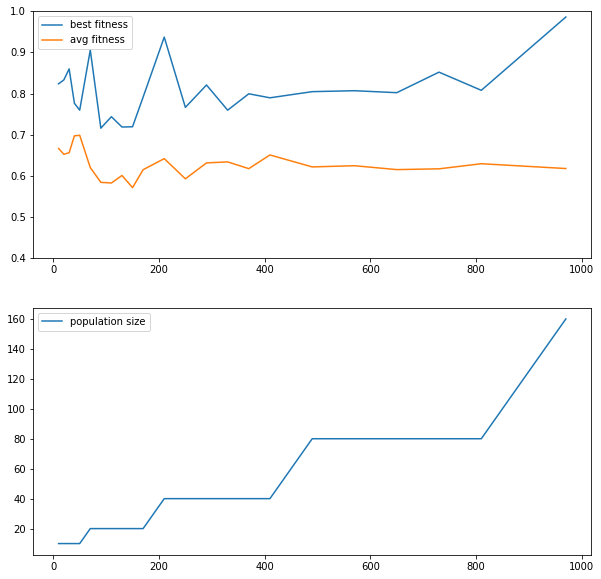

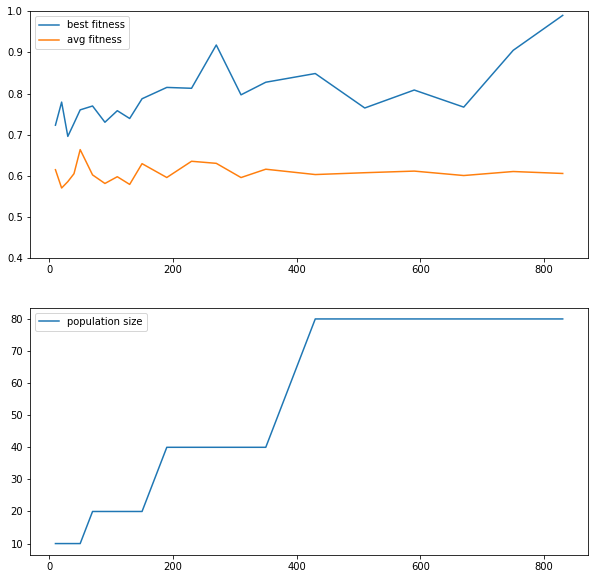

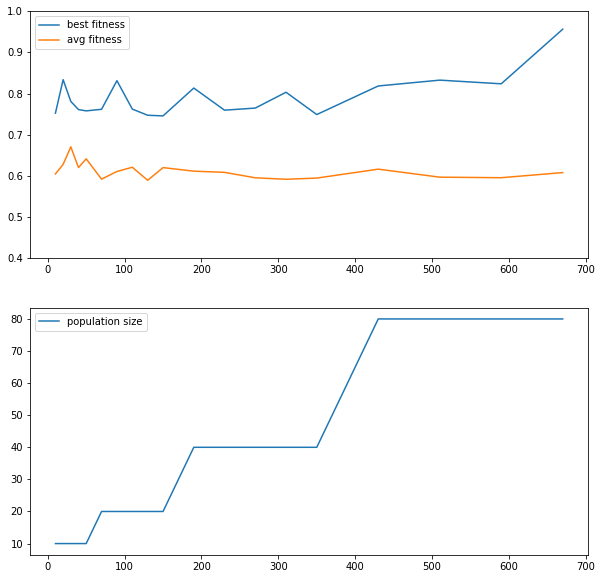

In [11]:
are_ipop_escape_nov_1 = "/home/leni/are-logs/are_ipop_escape_nov_1/"
x_vec = []
y_vec = []
for folder in os.listdir(are_ipop_escape_nov_1) :
    if(not os.path.isdir(are_ipop_escape_nov_1 + folder)) :
        continue
    neval, best_fit, avg_fit,pop_size = load_all_fitnesses(are_ipop_escape_nov_1 + folder + "/fitnesses_hn.csv")
    fig = plt.figure(figsize=[10,10])
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)
    ax1.set_ylim(0.4,1)
    ax1.plot(neval,best_fit,label="best fitness")
    ax1.plot(neval,avg_fit,label="avg fitness")
    ax2.plot(neval,pop_size,label="population size")
    
    
    ax1.legend()
    ax2.legend()
    plt.show()
    animation_pop(are_ipop_escape_nov_1 + folder,pop_size,1)

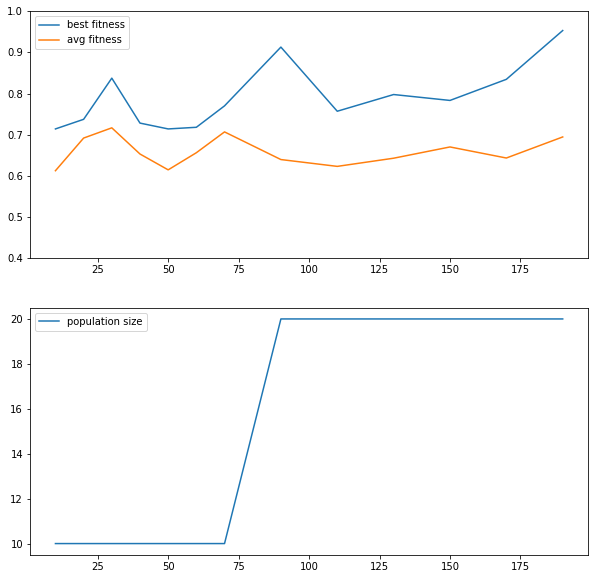

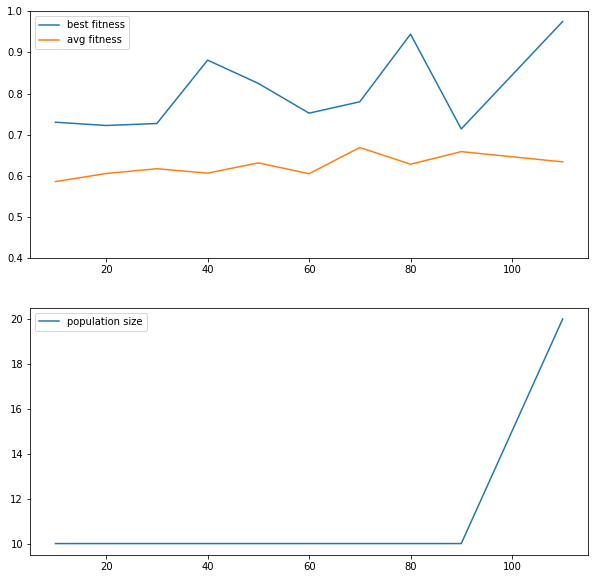

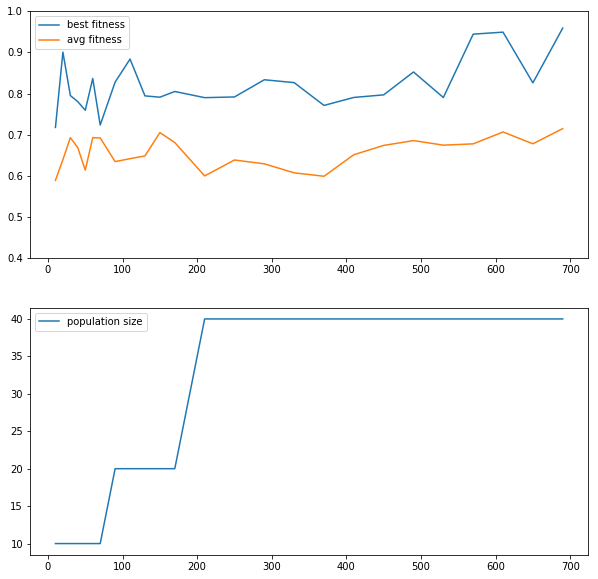

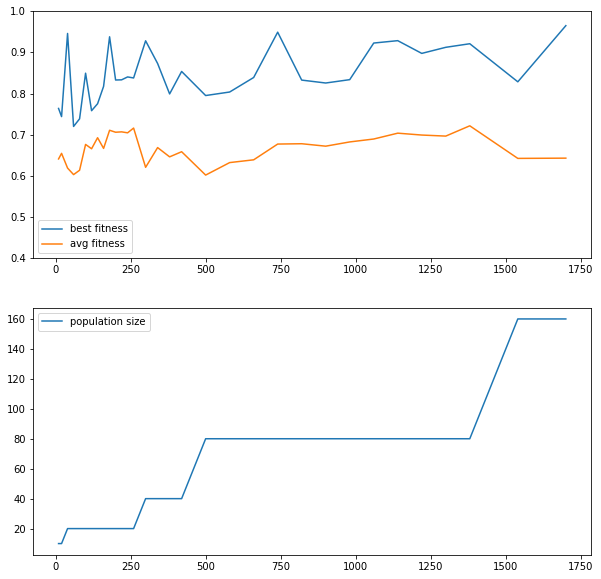

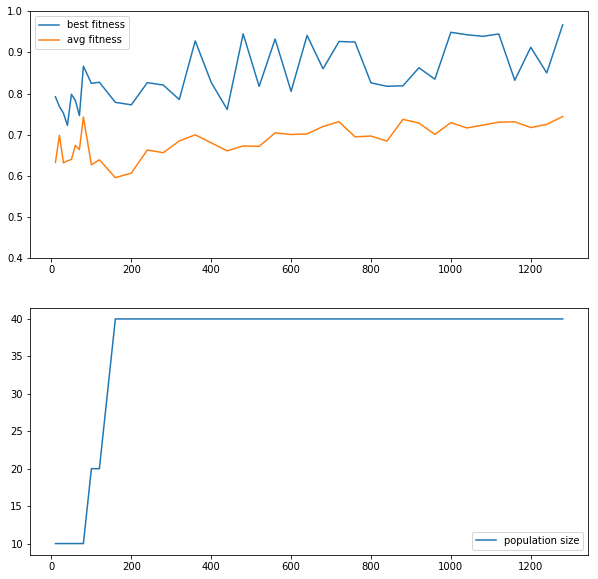

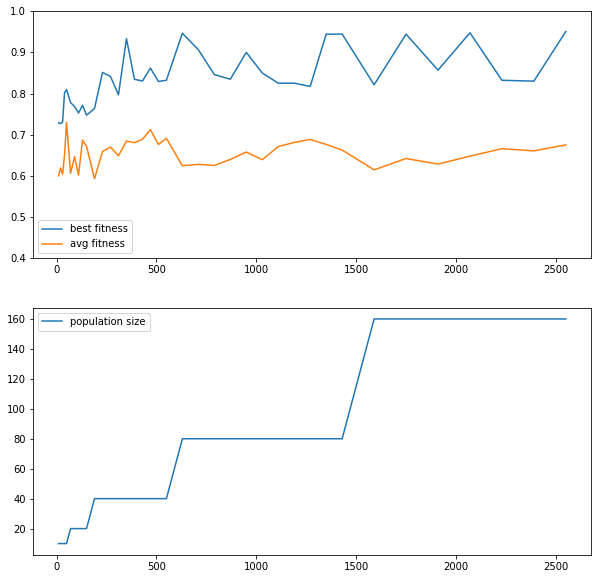

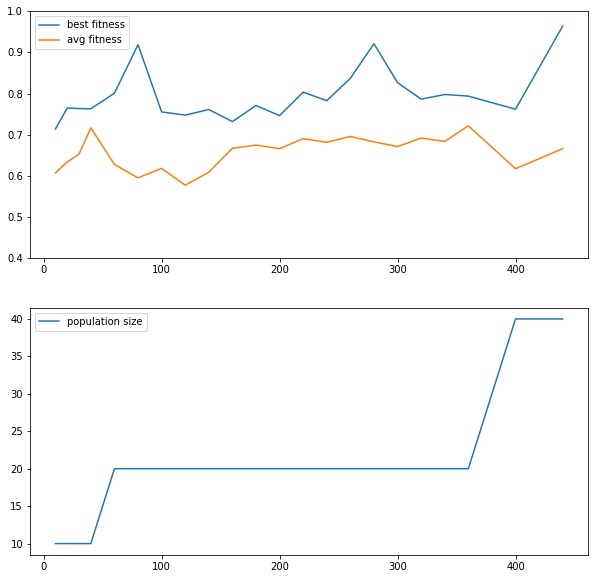

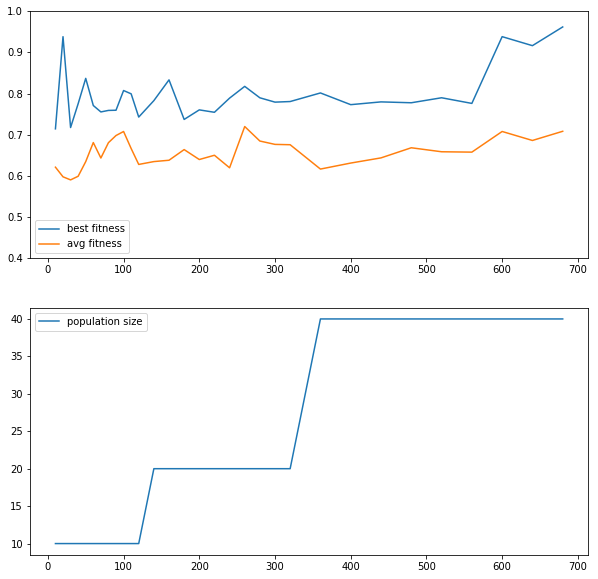

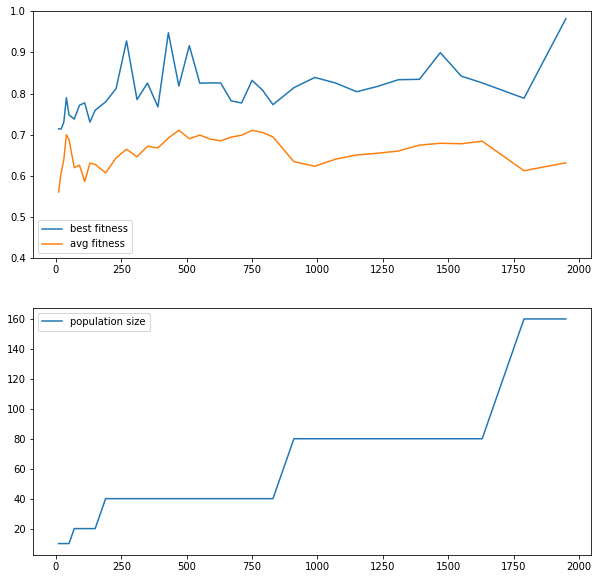

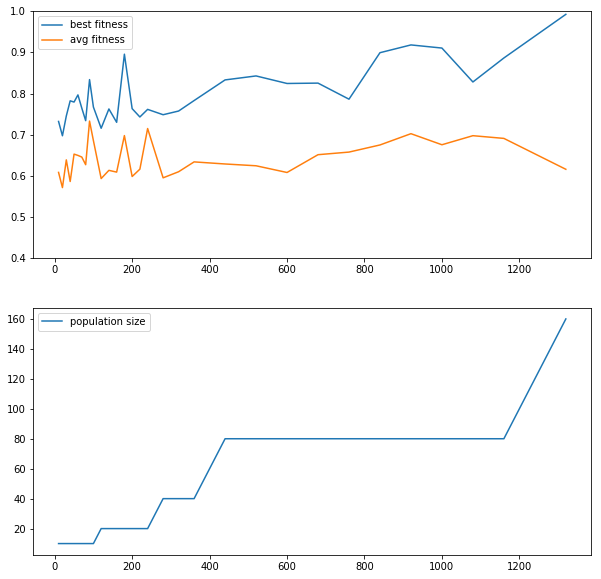

In [31]:
are_ipop_escape_los10 = "/home/leni/are-logs/are_ipop_escape_los10/"
x_vec = []
y_vec = []
for folder in os.listdir(are_ipop_escape_los10) :
    if(not os.path.isdir(are_ipop_escape_los10 + folder)) :
        continue
    neval, best_fit, avg_fit,pop_size = load_all_fitnesses(are_ipop_escape_los10 + folder + "/fitnesses_hn.csv")
    fig = plt.figure(figsize=[10,10])
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)
    ax1.set_ylim(0.4,1)
    ax1.plot(neval,best_fit,label="best fitness")
    ax1.plot(neval,avg_fit,label="avg fitness")
    ax2.plot(neval,pop_size,label="population size")
    
    
    ax1.legend()
    ax2.legend()
    plt.show()
    animation_pop(are_ipop_escape_los10 + folder,pop_size,1)

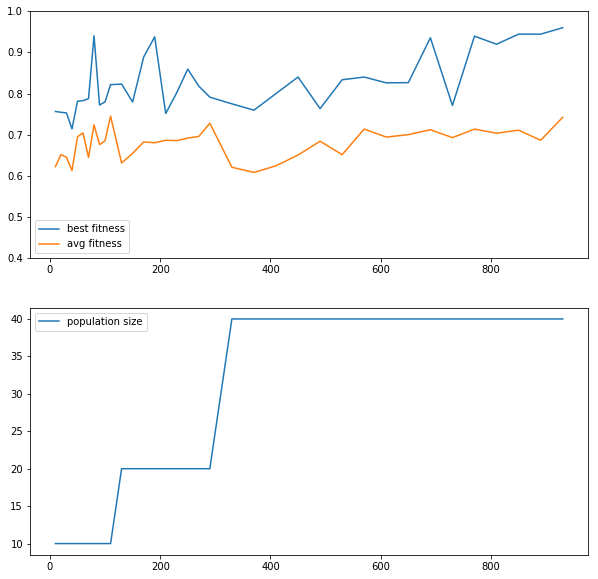

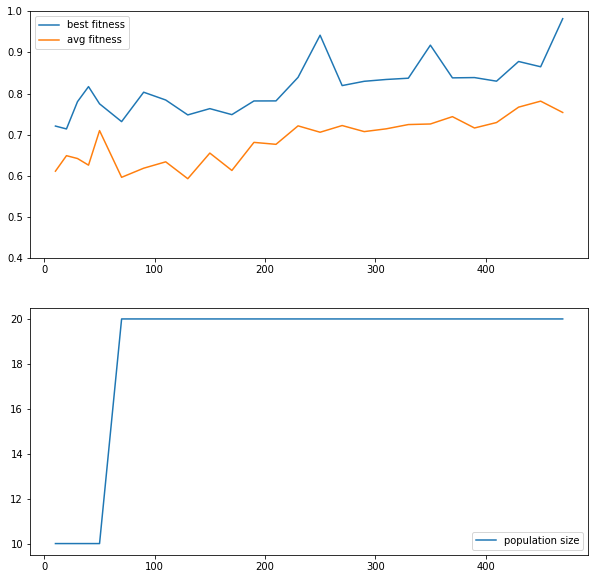

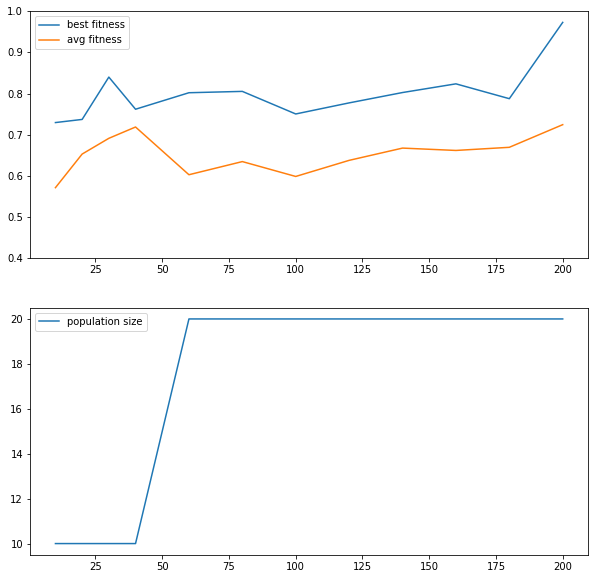

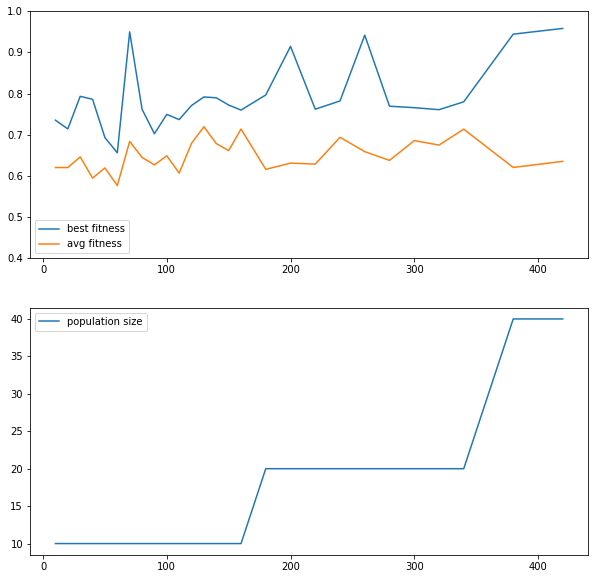

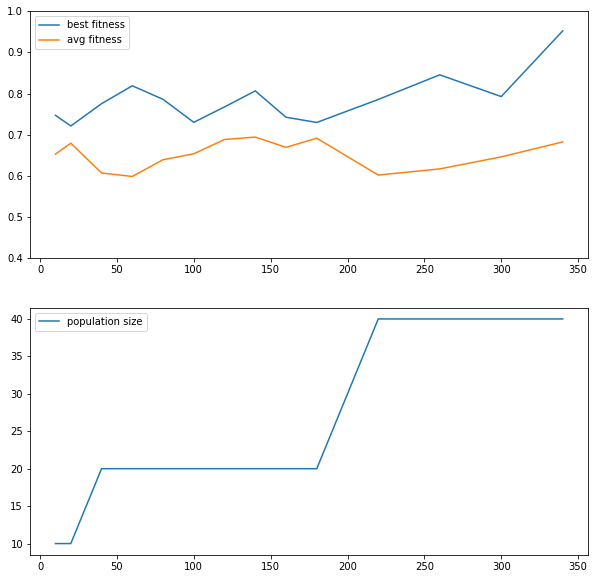

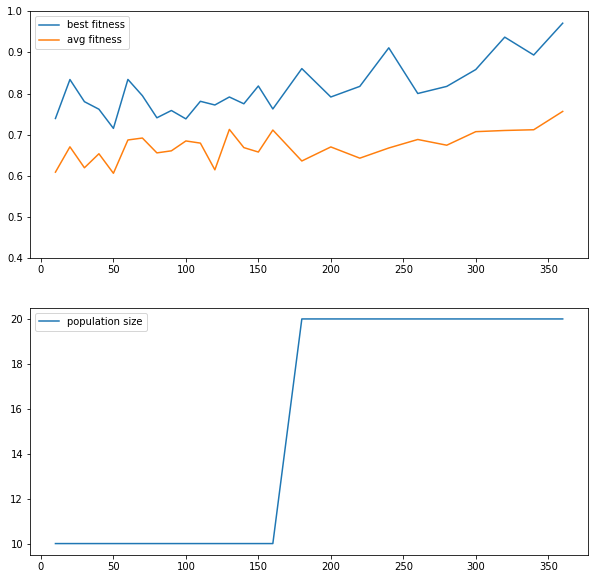

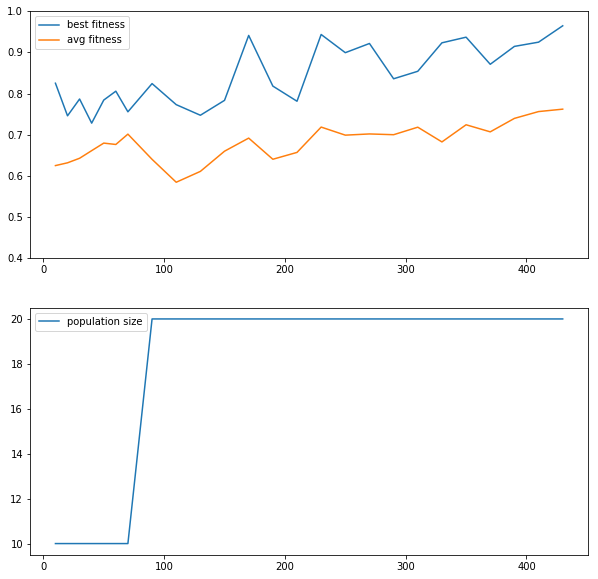

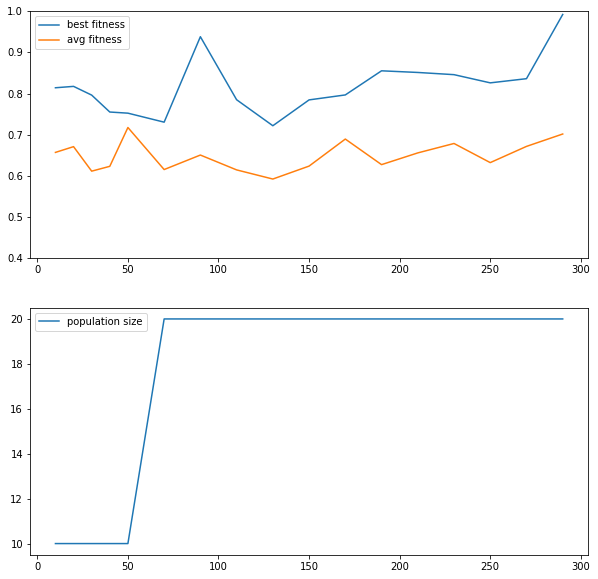

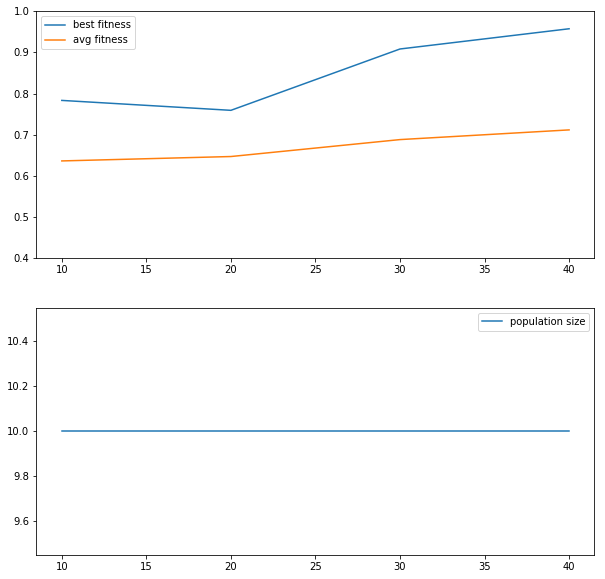

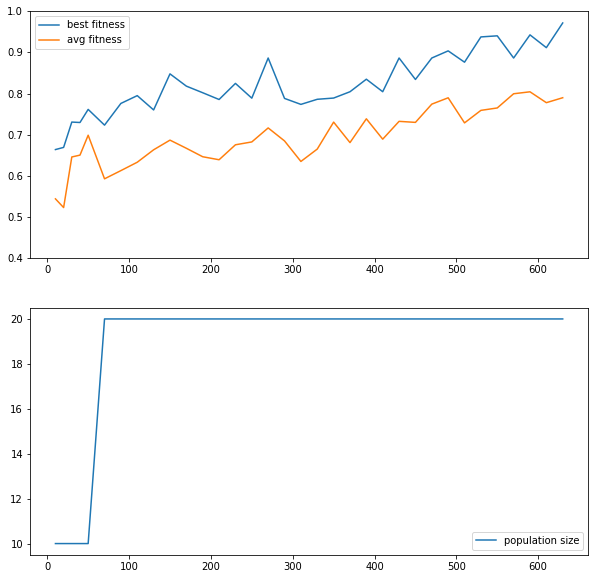

In [37]:
are_ipop_escape_nolos_kv5 = "/home/leni/are-logs/are_ipop_escape_nolos_kv5/"
x_vec = []
y_vec = []
for folder in os.listdir(are_ipop_escape_nolos_kv5) :
    if(not os.path.isdir(are_ipop_escape_nolos_kv5 + folder)) :
        continue
    neval, best_fit, avg_fit,pop_size = load_all_fitnesses(are_ipop_escape_nolos_kv5 + folder + "/fitnesses_hn.csv")
    fig = plt.figure(figsize=[10,10])
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)
    ax1.set_ylim(0.4,1)
    ax1.plot(neval,best_fit,label="best fitness")
    ax1.plot(neval,avg_fit,label="avg fitness")
    ax2.plot(neval,pop_size,label="population size")
    
    
    ax1.legend()
    ax2.legend()
    plt.show()
    animation_pop(are_ipop_escape_nolos_kv5 + folder,pop_size,1)

10
10


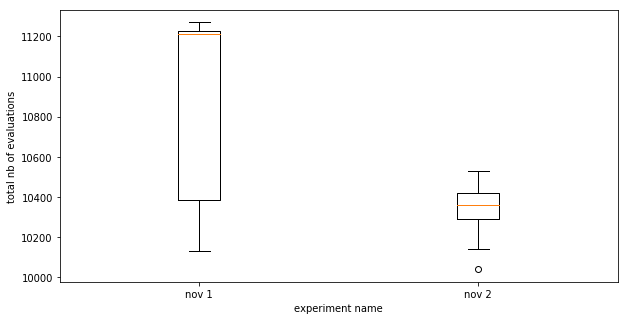

In [22]:
list_dir = ["/home/leni/are-logs/are_ipop_easy_nov_1/", \
           "/home/leni/are-logs/are_ipop_easy_nov_2/"]
list_label = ["nov 1","nov 2"]
best_fits = []
i = 0   
nbevals = []
for dire in list_dir :
    nevals = []
    for folder in os.listdir(dire) :
        if(folder.split("_")[0] != "ipop") :
            continue
        neval, best_fit, avg_fit,pop_size = load_all_fitnesses(dire + folder + "/fitnesses_hn.csv")
        nevals.append(neval[-1])
    print(len(nevals))
    nbevals.append(nevals)
    
plt.figure(figsize=(10,5))
plt.boxplot(nbevals,labels=list_label)
plt.ylabel("total nb of evaluations")
plt.xlabel("experiment name")
plt.show()

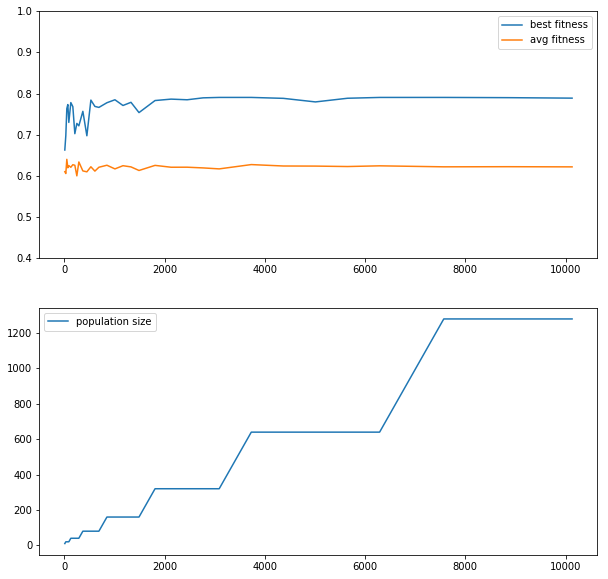

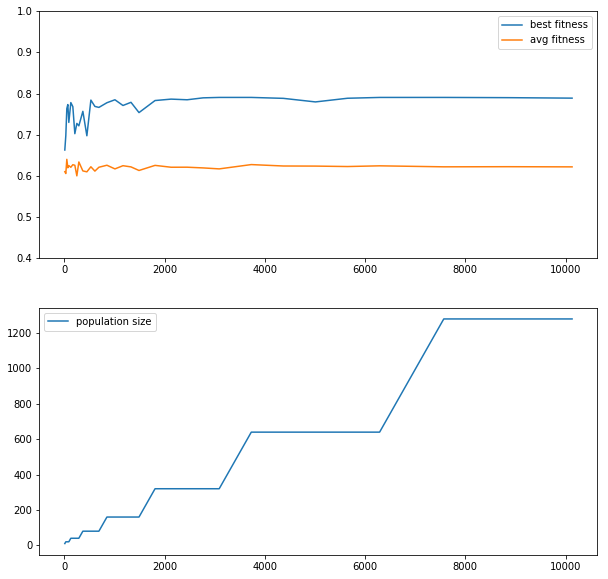

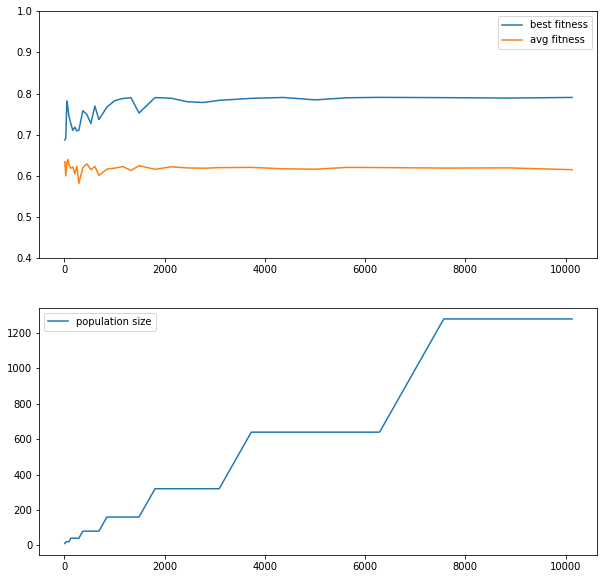

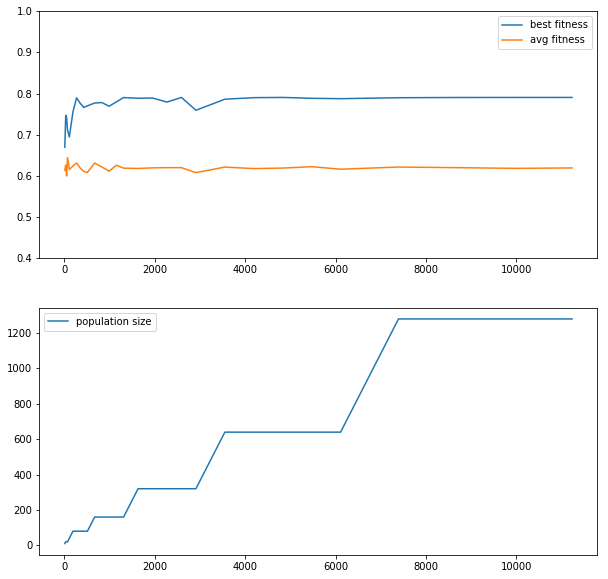

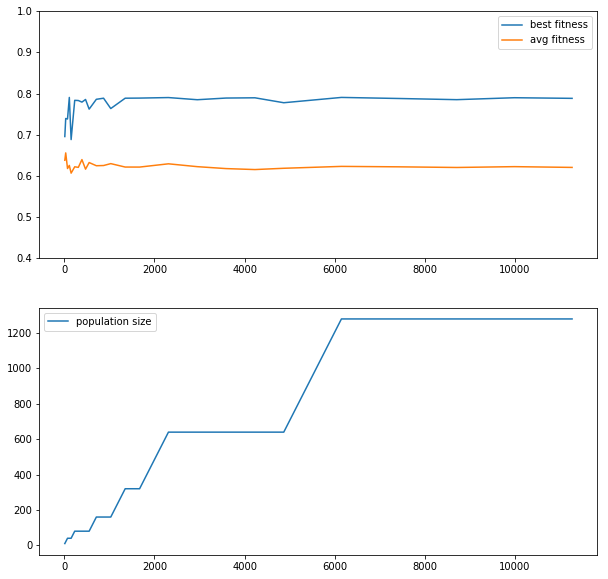

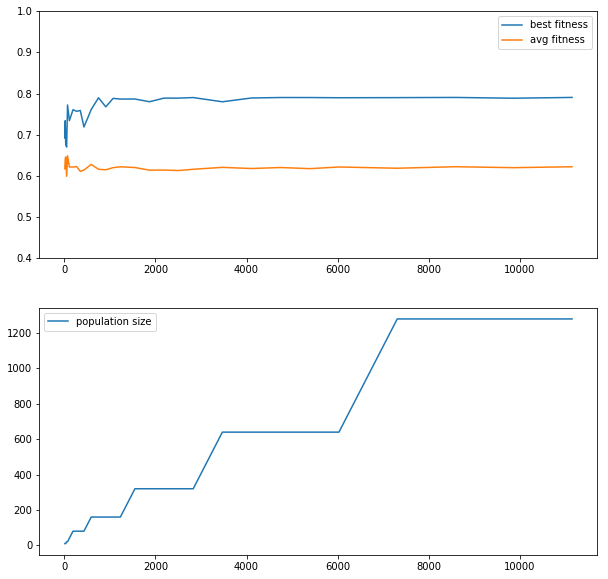

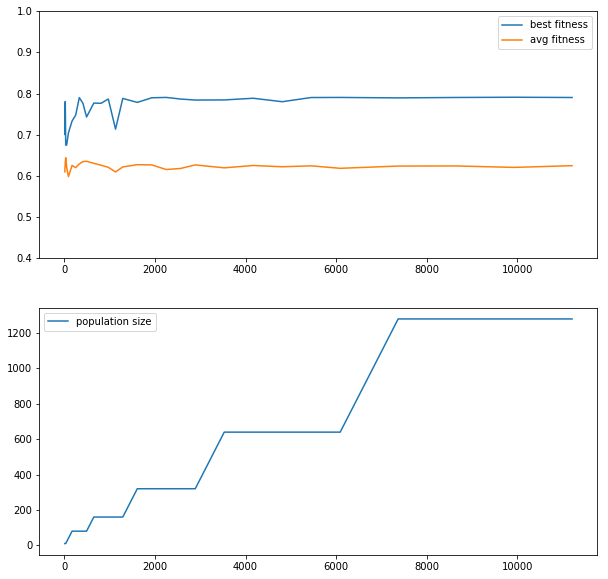

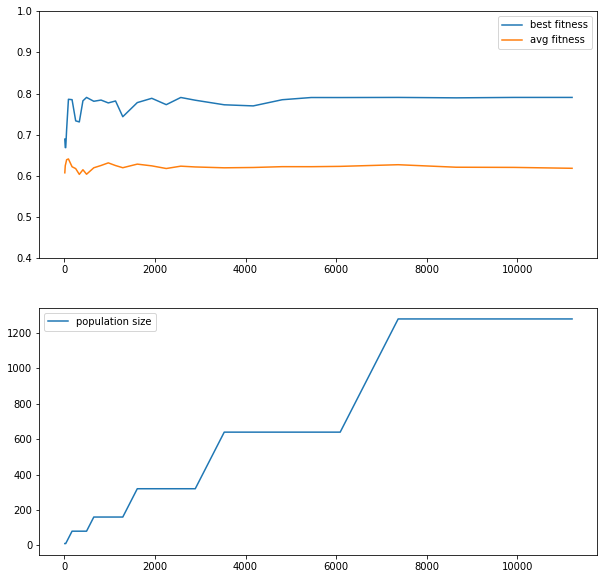

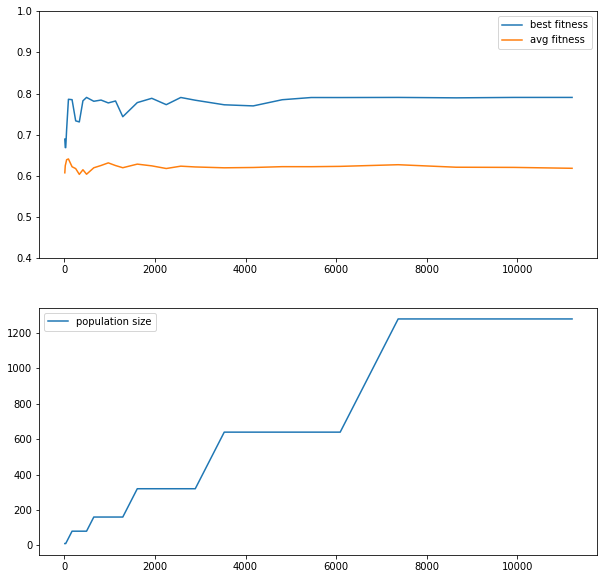

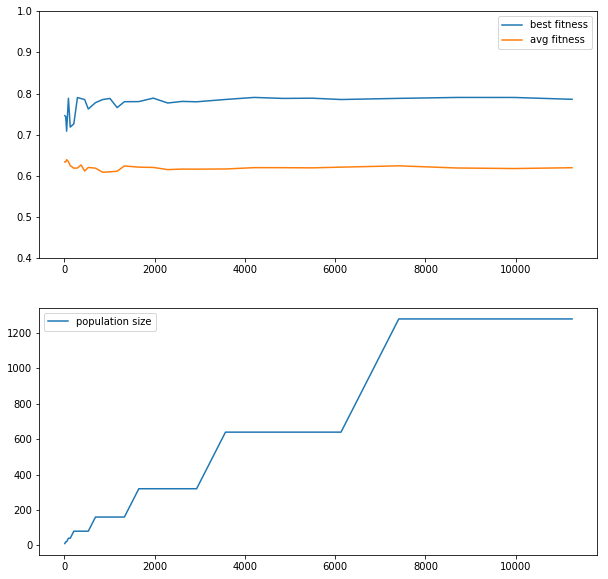

In [29]:
are_ipop_easy_nov_1 = "/home/leni/are-logs/are_ipop_easy_nov_1/"
x_vec = []
y_vec = []
for folder in os.listdir(are_ipop_easy_nov_1) :
    if(not os.path.isdir(are_ipop_easy_nov_1 + folder)) :
        continue
    neval, best_fit, avg_fit,pop_size = load_all_fitnesses(are_ipop_easy_nov_1 + "/" + folder + "/fitnesses_hn.csv")
    fig = plt.figure(figsize=[10,10])
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)
    ax1.set_ylim(0.4,1)
    ax1.plot(neval,best_fit,label="best fitness")
    ax1.plot(neval,avg_fit,label="avg fitness")
    ax2.plot(neval,pop_size,label="population size")
    
    ax1.legend()
    ax2.legend()
    plt.show()
    animation_pop(are_ipop_easy_nov_1 + folder,pop_size,1)

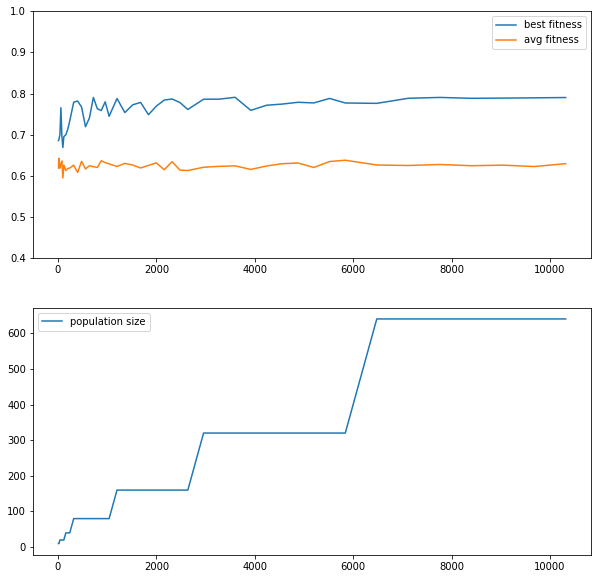

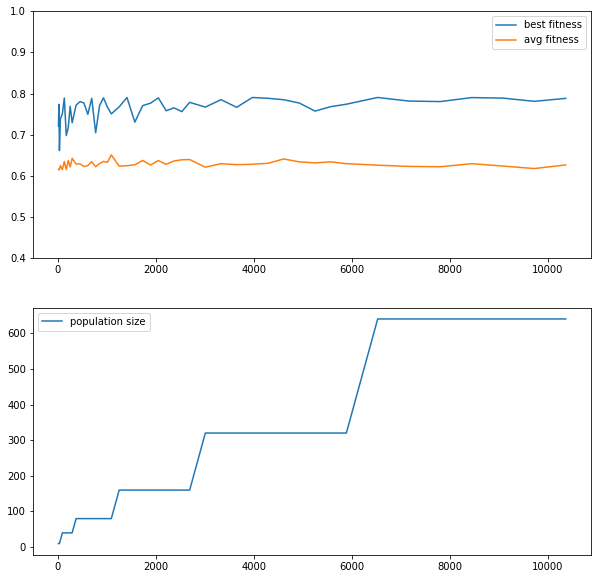

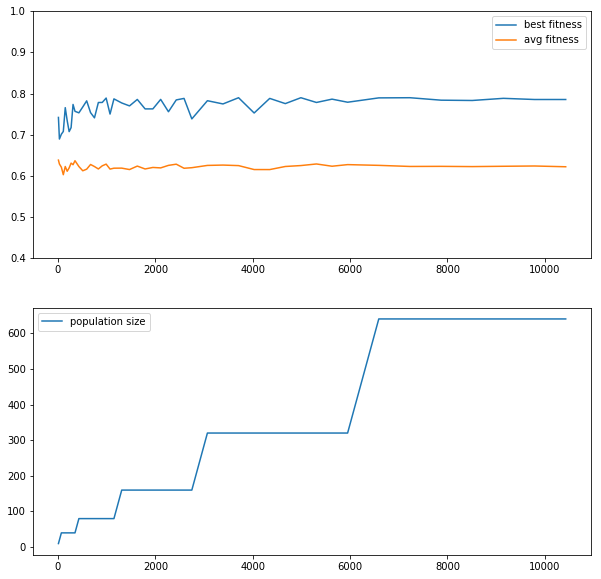

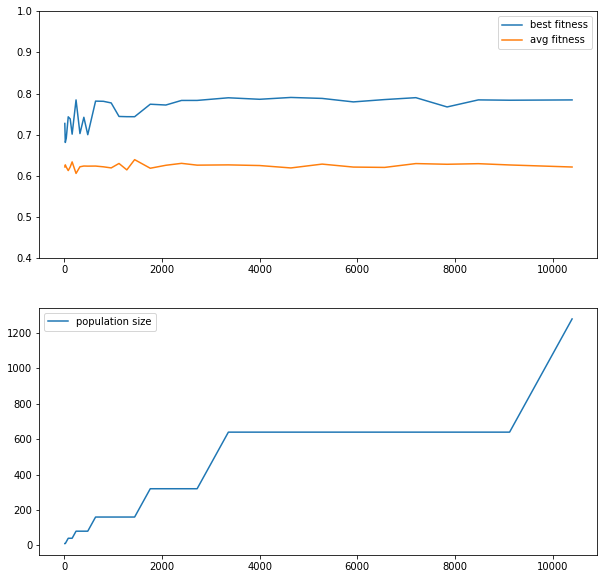

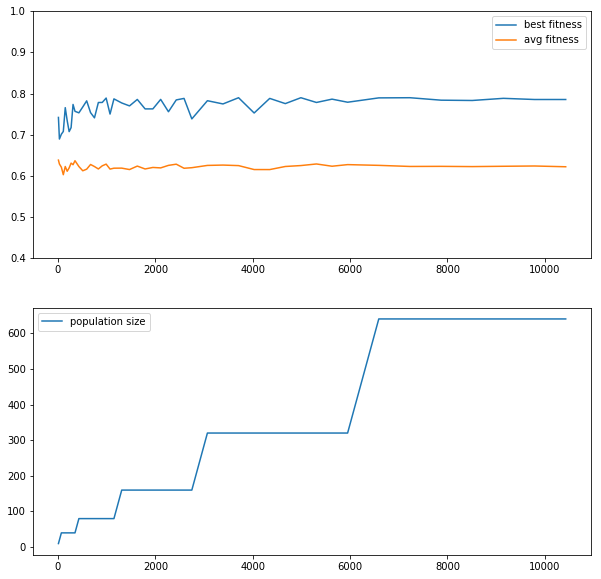

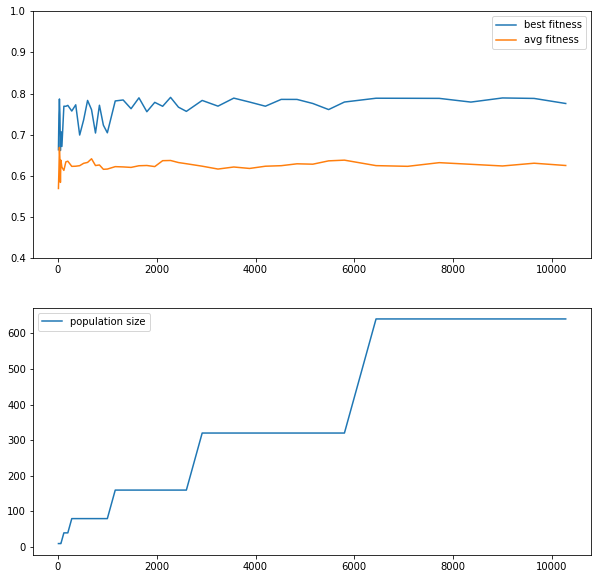

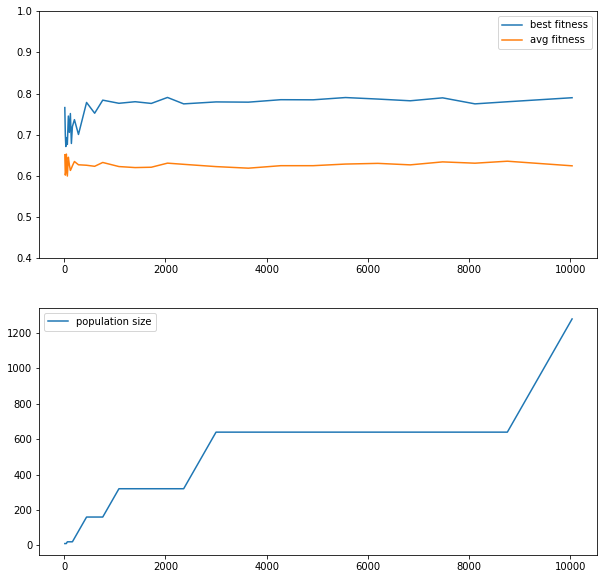

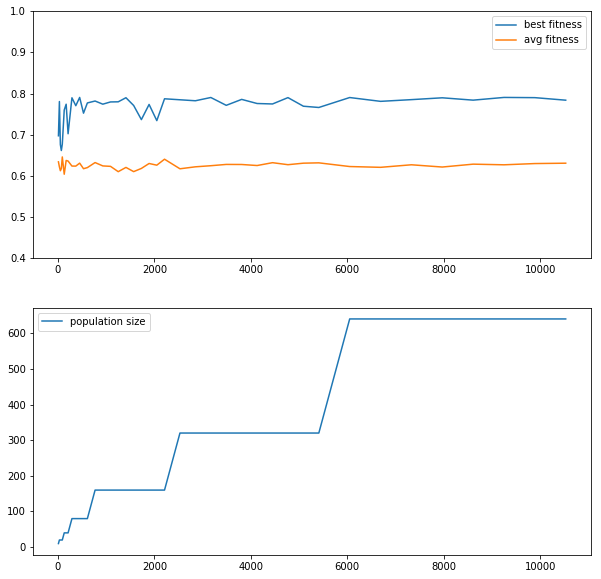

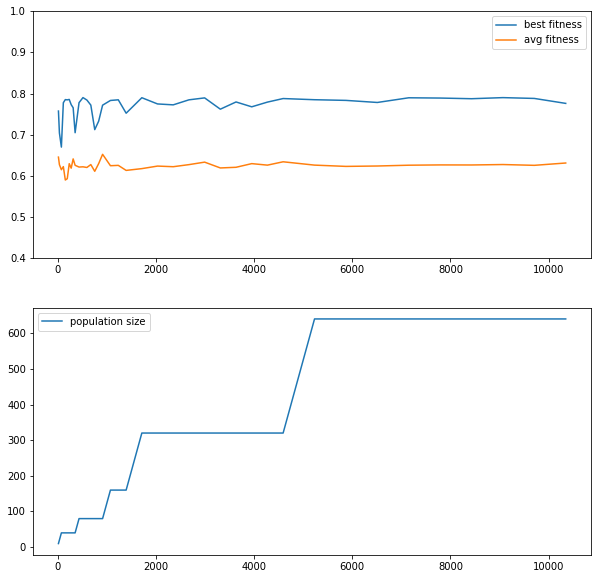

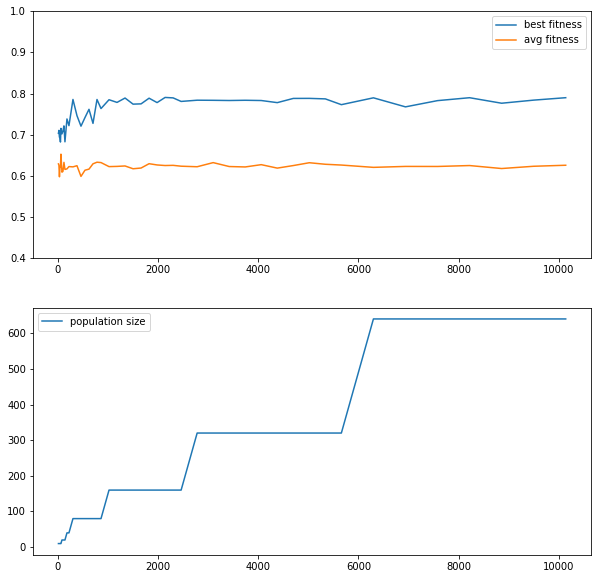

In [30]:
are_ipop_easy_nov_2 = "/home/leni/are-logs/are_ipop_easy_nov_2/"
x_vec = []
y_vec = []
for folder in os.listdir(are_ipop_easy_nov_2) :
    if(not os.path.isdir(are_ipop_easy_nov_2 + folder)) :
        continue
    neval, best_fit, avg_fit,pop_size = load_all_fitnesses(are_ipop_easy_nov_2 + folder + "/fitnesses_hn.csv")
    fig = plt.figure(figsize=[10,10])
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)
    ax1.set_ylim(0.4,1)
    ax1.plot(neval,best_fit,label="best fitness")
    ax1.plot(neval,avg_fit,label="avg fitness")
    ax2.plot(neval,pop_size,label="population size")
    
    
    ax1.legend()
    ax2.legend()
    plt.show()
    animation_pop(are_ipop_easy_nov_2 + folder,pop_size,1)

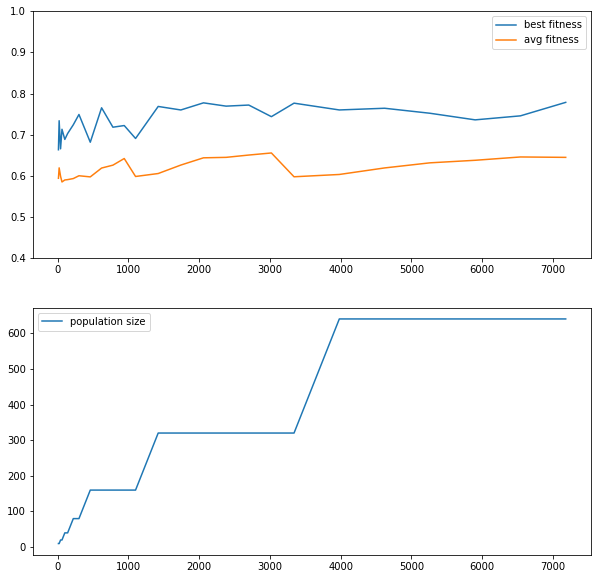

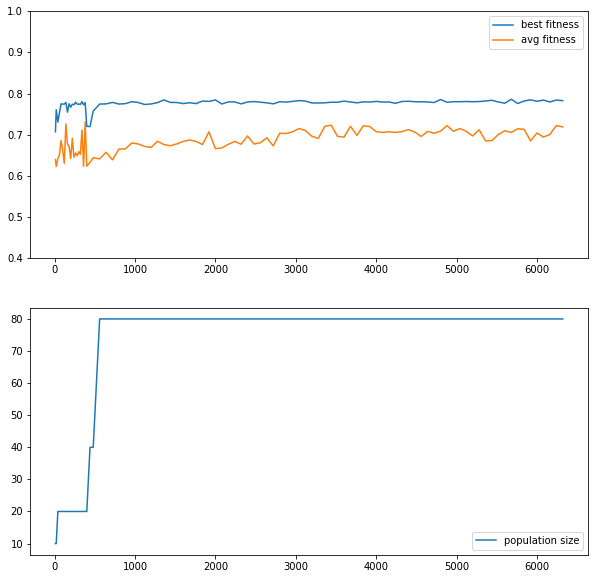

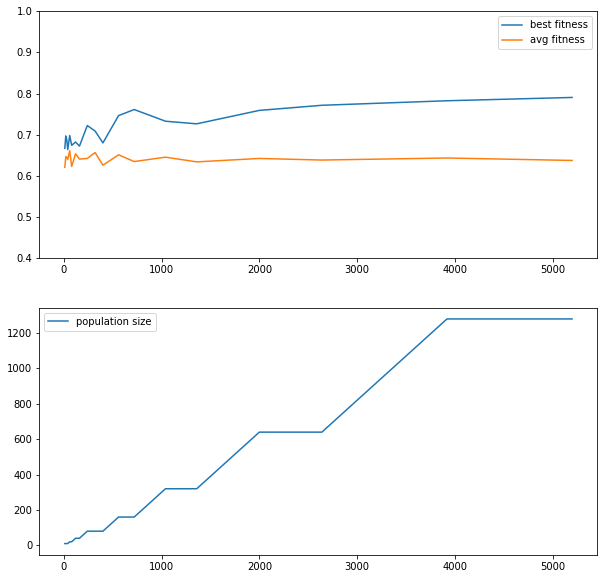

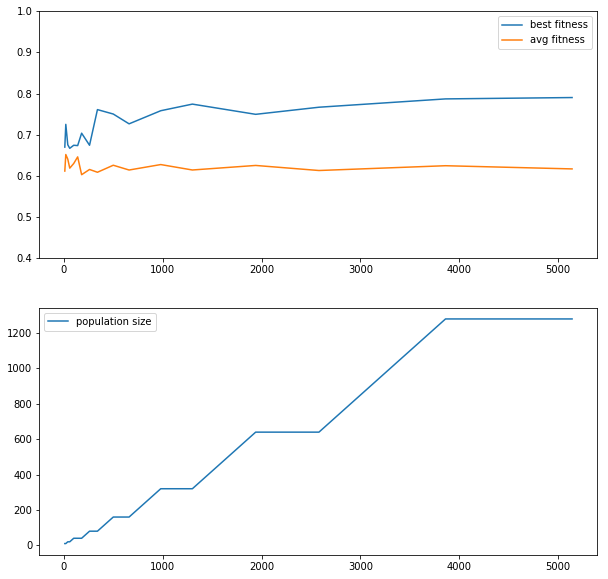

In [38]:
are_ipop_easy_1 = "/home/leni/are-logs/are_ipop_easy_1/"
x_vec = []
y_vec = []
for folder in os.listdir(are_ipop_easy_1) :
    if(not os.path.isdir(are_ipop_easy_1 + folder)) :
        continue
    neval, best_fit, avg_fit,pop_size = load_all_fitnesses(are_ipop_easy_1 + folder + "/fitnesses_hn.csv")
    fig = plt.figure(figsize=[10,10])
    ax1 = fig.add_subplot(2,1,1)
    ax2 = fig.add_subplot(2,1,2)
    ax1.set_ylim(0.4,1)
    ax1.plot(neval,best_fit,label="best fitness")
    ax1.plot(neval,avg_fit,label="avg fitness")
    ax2.plot(neval,pop_size,label="population size")
    
    
    ax1.legend()
    ax2.legend()
    plt.show()
    animation_pop(are_ipop_easy_1 + folder,pop_size,1)